## Libraries

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load dataset

In [194]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [196]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


RestingBP: resting blood pressure [mm Hg] there are 0, meaning lack of information
Cholesterol: serum cholesterol [mm/dl], there are 0, meaning lack of information

In [197]:
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [198]:
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


I am a visual person so just gonna go straight to visualisations

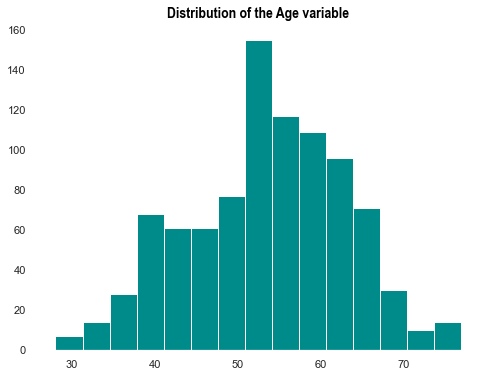

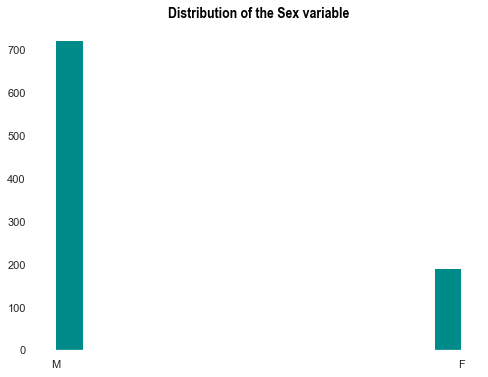

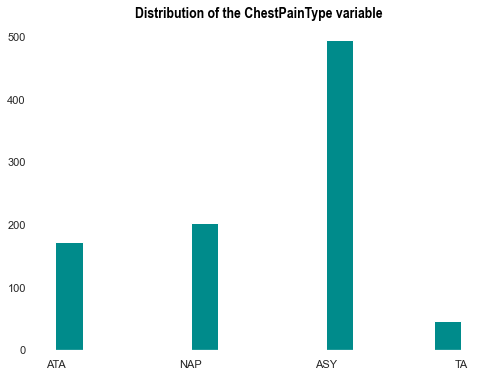

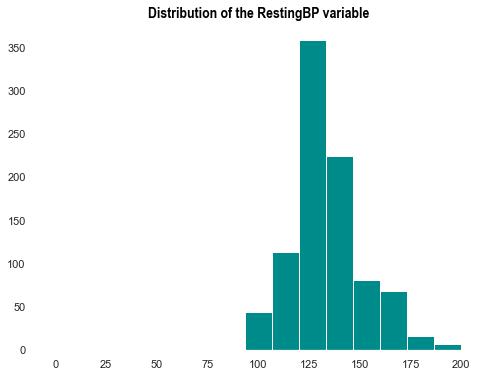

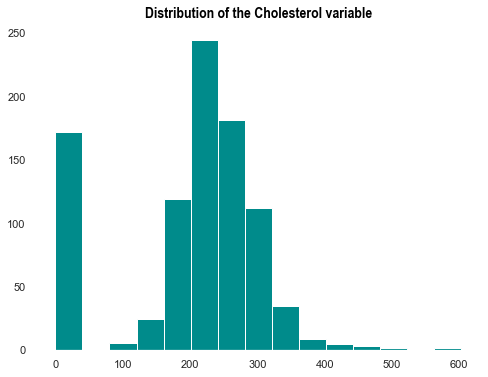

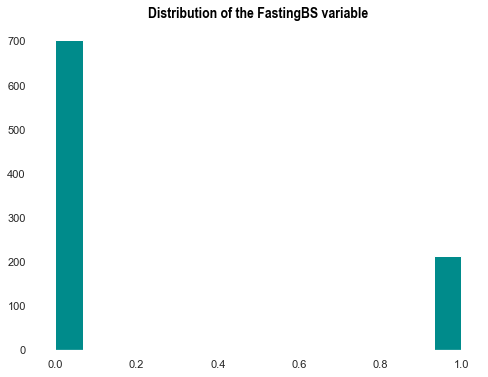

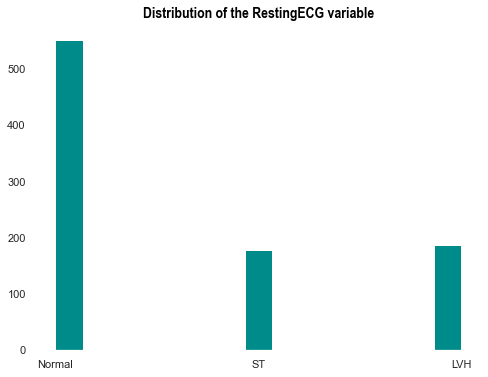

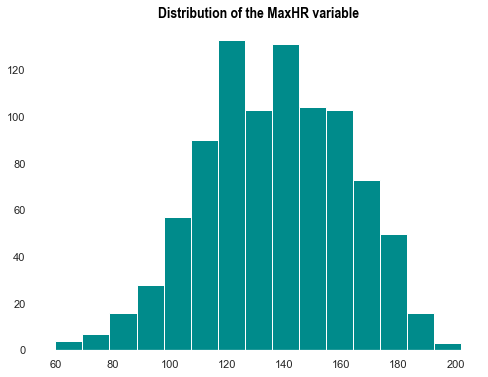

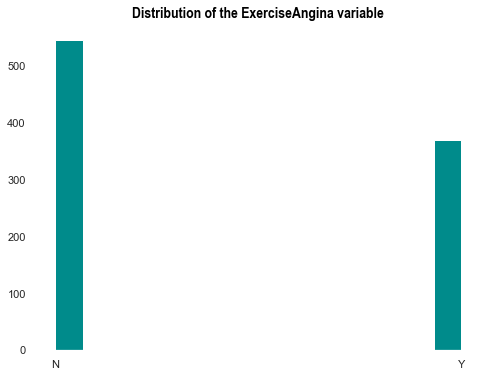

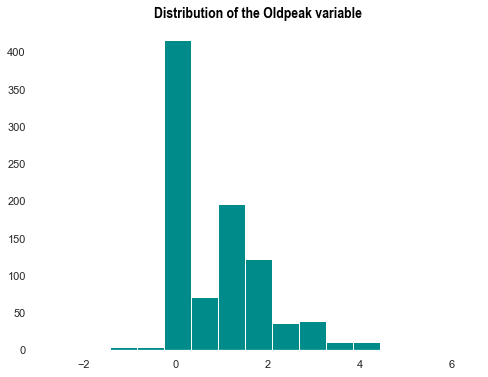

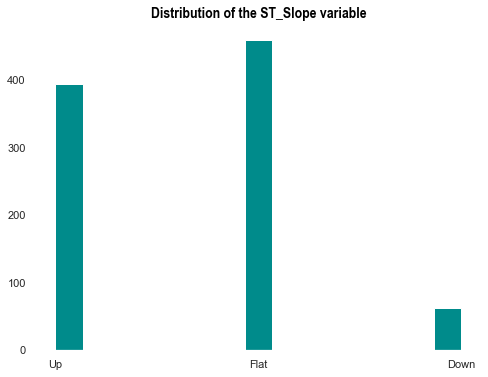

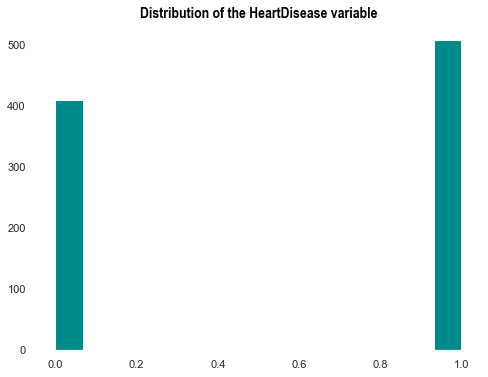

In [199]:
for feature in df.columns:
#background
    f, ax = plt.subplots(figsize=(8,6))
    ax.set_facecolor('white')
    ax.spines[["top", "right", "left"]].set_visible(False)
#text
    plt.title('Distribution of the {} variable'.format(feature) ,{'font':'Arial Narrow', 'weight':'bold','color': 'black', 'size':15})
#Distribution of age variable
    plt.hist(x= df[feature], alpha=1, color="darkcyan", bins=15)
    plt.show()


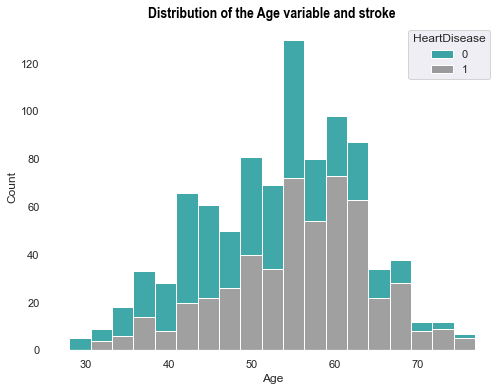

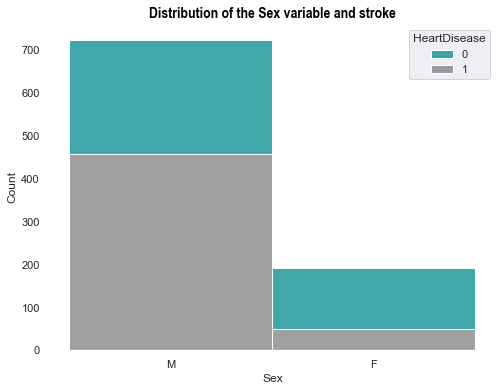

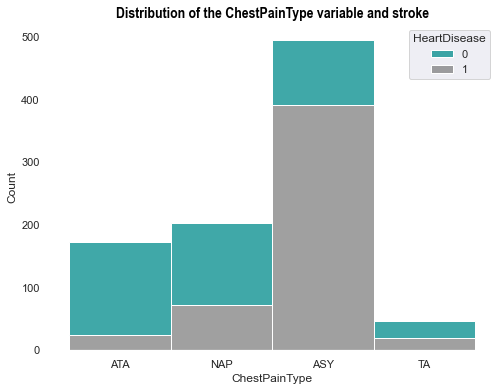

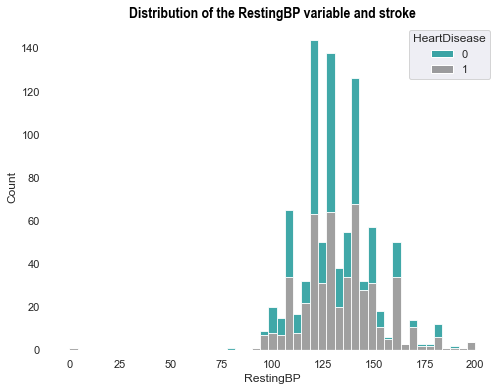

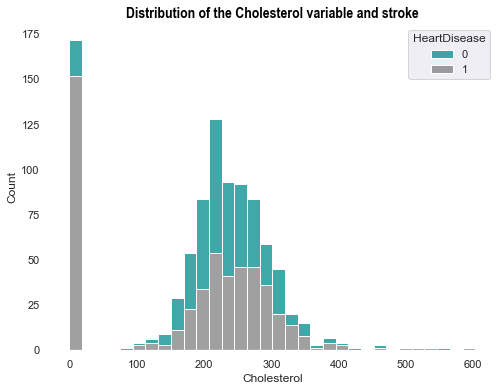

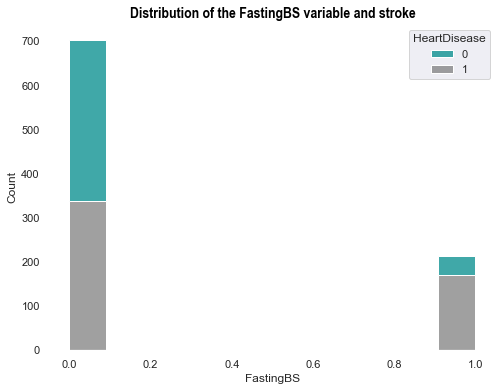

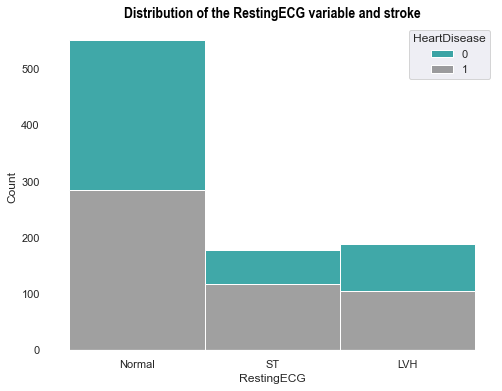

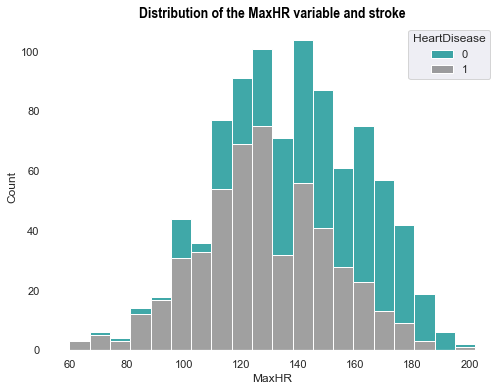

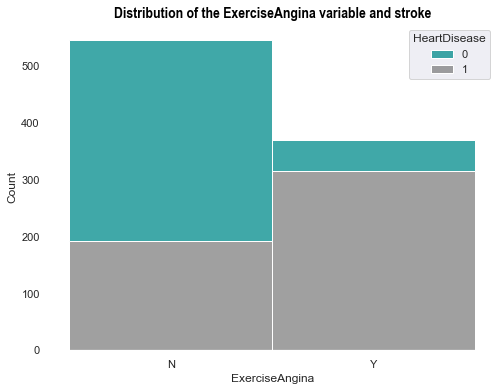

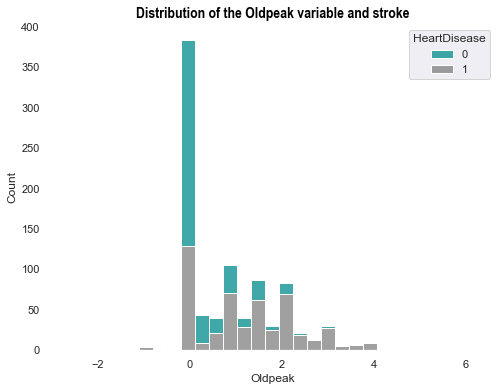

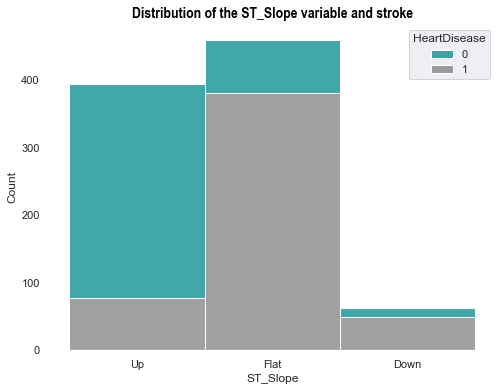

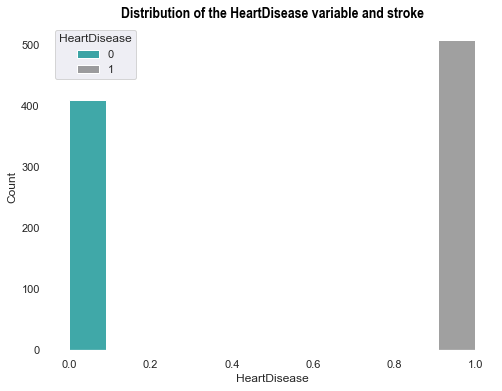

In [200]:
palette2=["darkcyan","grey"]

for i in df.columns:
    f, ax = plt.subplots(figsize=(8,6))
    ax.spines[["top", "right", "left"]].set_visible(False)
    plt.title("Distribution of the {} variable and stroke".format(i), {'font':'Arial Narrow', 'weight':'bold','color': 'black', 'size':15})
    #background
    ax.set_facecolor('white')
    sns.histplot(data= df, x=i, hue= "HeartDisease", stat= "count", palette=palette2, multiple="stack")
    plt.show()

Text(590, 0.0075, 'Healthy')

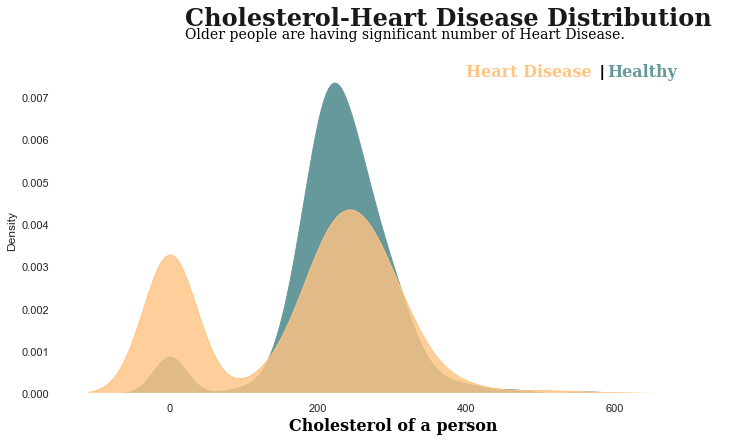

In [201]:
## Age and HeartDisease

#color palette for visualizations
colors = ['#f6f5f5','#66999B','#B3AF8F','#FFC482']
palette = sns.color_palette( palette = colors)

f, ax = plt.subplots(figsize=(12,6))

#background
ax.set_facecolor('white')

sns.kdeplot(data = df[df['HeartDisease'] == 0], ax = ax, x = 'Cholesterol', shade = True,  alpha = 1, color = '#66999B' )
sns.kdeplot(data = df[df['HeartDisease'] == 1],ax = ax,x = 'Cholesterol', shade = True,  alpha = 0.8, color = '#FFC482')

ax.set_xlabel('Cholesterol of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax.spines[["top", "right", "left"]].set_visible(False)
ax.text(20,0.00870,"Cholesterol-Heart Disease Distribution", {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax.text(20,0.00840,'Older people are having significant number of Heart Disease.', {'font':'Serif', 'color': 'black', 'size':14})
ax.text(400,0.00750, 'Heart Disease ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#FFC482'})
ax.text(580, 0.00750, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax.text(590,0.00750, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#66999B'})

<AxesSubplot:xlabel='ChestPainType', ylabel='Cholesterol'>

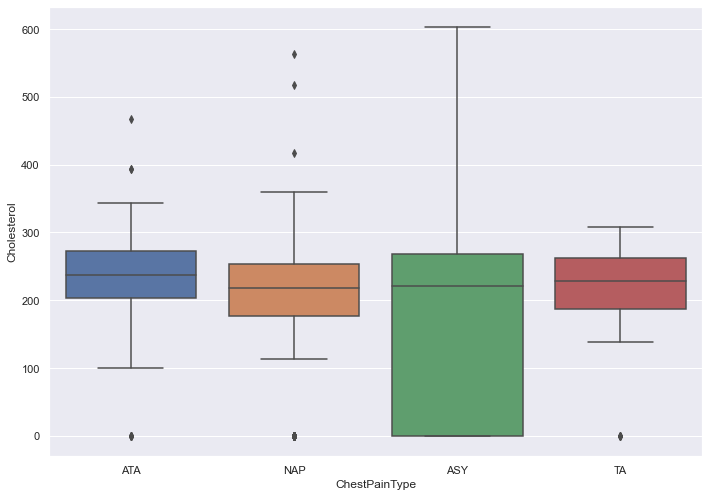

In [202]:
sns.boxplot(data=df, x="ChestPainType", y="Cholesterol")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

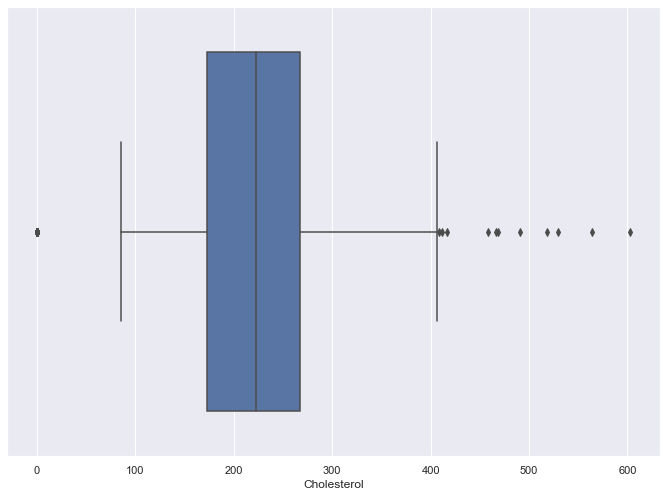

In [203]:
sns.boxplot(df.Cholesterol) 

Text(80, 0.045, 'Healthy')

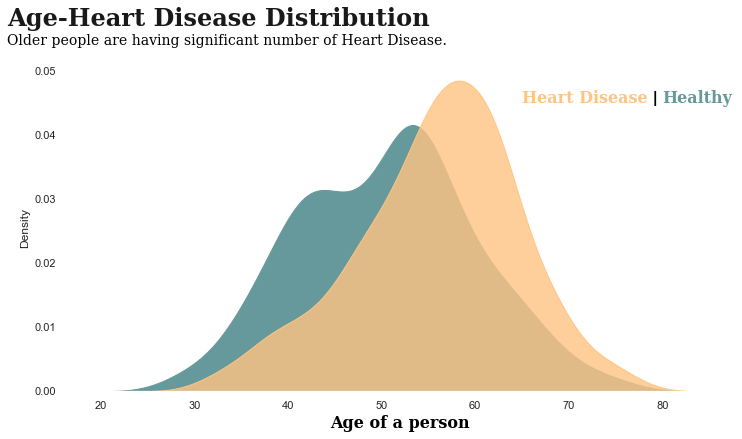

In [204]:
## Age and HeartDisease

#color palette for visualizations
colors = ['#f6f5f5','#66999B','#B3AF8F','#FFC482']
palette = sns.color_palette( palette = colors)

f, ax = plt.subplots(figsize=(12,6))

#background
ax.set_facecolor('white')

sns.kdeplot(data = df[df['HeartDisease'] == 0], ax = ax, x = 'Age', shade = True,  alpha = 1, color = '#66999B' )
sns.kdeplot(data = df[df['HeartDisease'] == 1],ax = ax,x = 'Age', shade = True,  alpha = 0.8, color = '#FFC482')

ax.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax.spines[["top", "right", "left"]].set_visible(False)

ax.text(10,0.0570,"Age-Heart Disease Distribution", {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax.text(10,0.0540,'Older people are having significant number of Heart Disease.', {'font':'Serif', 'color': 'black', 'size':14})
ax.text(65,0.0450, 'Heart Disease ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#FFC482'})
ax.text(79,0.0450, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax.text(80,0.0450, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#66999B'})

#### Split data

In [205]:
### split data
X = df.drop("HeartDisease", axis=1)
y= df["HeartDisease"]

In [206]:
#import train, test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Visualisations

##### Correlation plot

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'RestingBP'),
  Text(2.5, 0, 'Cholesterol'),
  Text(3.5, 0, 'FastingBS'),
  Text(4.5, 0, 'MaxHR'),
  Text(5.5, 0, 'Oldpeak')])

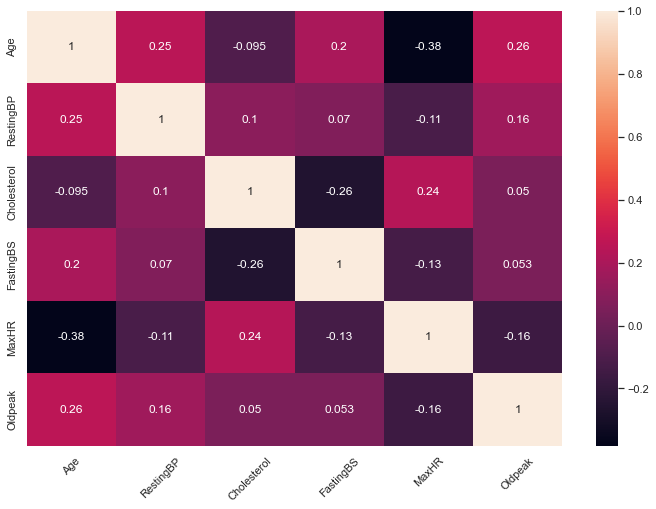

In [207]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True)
plt.xticks(rotation=45)

##### Gini Impurity

#### Missing values

In [208]:
#X_train["Cholesterol"] = X_train["Cholesterol"].replace(0, np.nan)
#X_train.describe()

In [209]:
#different categorica
categorical = df.select_dtypes('object').columns

df[categorical].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [210]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#labelencoder for those with 2 categories
encoder = LabelEncoder()
columns = "FastingBS", "Sex", "ExerciseAngina"

for col in columns:
    X_train[col] = encoder.fit_transform(X_train[col])

#one-hot encoder for those with more than 2 catgories
categories = ["ChestPainType", "RestingECG", "ST_Slope"]
X_train = pd.get_dummies(X_train, columns = categories, prefix=categories)


#numerical
mm = MinMaxScaler()
numerical = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
features = X_train[numerical]
features = mm.fit_transform(features.values)
X_train[numerical] = features

#check dataframe
X_train.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
400,0.448980,0,0.800,0.000000,1,0.352113,0,0.295455,1,0,0,0,0,1,0,0,1,0
107,0.122449,1,0.750,0.354892,0,0.760563,0,0.295455,0,1,0,0,0,0,1,0,0,1
565,0.673469,1,0.705,0.484245,0,0.387324,1,0.488636,1,0,0,0,0,0,1,0,1,0
578,0.591837,1,0.780,0.286899,0,0.415493,1,0.636364,1,0,0,0,1,0,0,1,0,0
372,0.714286,1,0.925,0.000000,0,0.267606,1,0.295455,1,0,0,0,0,1,0,0,0,1


### FEature selection

<AxesSubplot:>

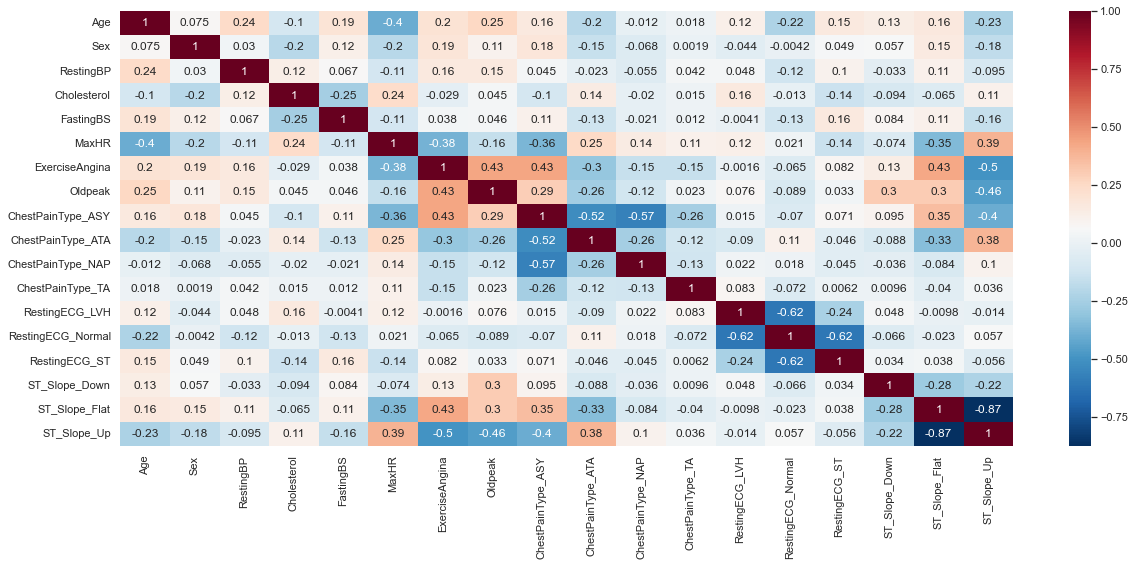

In [211]:
plt.rcParams["figure.figsize"] = (20,8)

#pearson is default
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot = True, cmap = "RdBu_r")

In [212]:
#loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        #print variables with high correlation
        if abs(corr_matrix.iloc[i,j]) >0.5:
            print(corr_matrix.columns[i],

corr_matrix.columns[j], corr_matrix.iloc[i,j])

ChestPainType_ATA ChestPainType_ASY -0.5226120844091247
ChestPainType_NAP ChestPainType_ASY -0.5706164393263519
RestingECG_Normal RestingECG_LVH -0.6156448753308598
RestingECG_ST RestingECG_Normal -0.6156448753308595
ST_Slope_Up ST_Slope_Flat -0.8734600152429541


In [213]:
#from sklearn.ensemble import RandomForestClassifier

#clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the classifier to the training set
#clf.fit(X_train, y_train)
# predict on the test set
#y_pred = clf.predict(X_test)

#plot
#feat_importances = pd.Series(clf.feature_importances_, index= X_train.columns)
#plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='white', edgecolor='k')
#feat_importances.nlargest(9).plot(kind='barh')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ChestPainType
- RestingECG
- ST_Slope
Feature names seen at fit time, yet now missing:
- ChestPainType_ASY
- ChestPainType_ATA
- ChestPainType_NAP
- ChestPainType_TA
- RestingECG_LVH
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'M'

#### Sequential Forward Selection

('Sex', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'ChestPainType_ASY', 'RestingECG_Normal', 'ST_Slope_Down', 'ST_Slope_Up')
0.8787465940054496


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


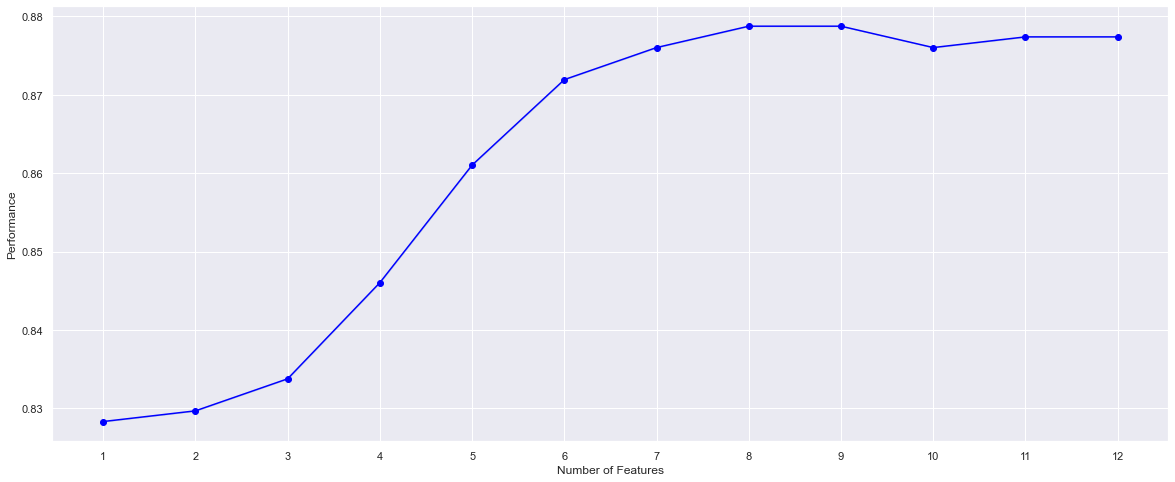

In [214]:

from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LogisticRegression(max_iter=1000)

sfs = SFS(lr, k_features= 12,
forward= True,
floating= True,
scoring="accuracy", cv=0)

sfs.fit(X_train, y_train)

print(sfs.subsets_[8]["feature_names"])
print(sfs.subsets_[8]["avg_score"])

plot_sfs(sfs.get_metric_dict())
plt.show()



### Models

In [215]:
#create an empty list for models
model_comparison = {}

#### test data 

In [216]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score #for crossvalidations

#labelencoder for those with 2 categories
encoder = LabelEncoder()
columns = "FastingBS", "Sex", "ExerciseAngina"

for col in columns:
    X_test[col] = encoder.fit_transform(X_test[col])

#one-hot encoder for those with more than 2 catgories
categories = ["ChestPainType", "RestingECG", "ST_Slope"]
X_test = pd.get_dummies(X_test, columns = categories, prefix=categories)


#numerical
mm = MinMaxScaler()
numerical = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
features = X_test[numerical]
features = mm.fit_transform(features.values)
X_test[numerical] = features


#check dataframe
X_test.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
440,0.465116,1,0.314286,0.000000,0,0.901639,0,0.688889,0,0,1,0,0,0,1,0,0,1
382,0.255814,1,0.190476,0.000000,0,0.614754,1,0.466667,1,0,0,0,0,1,0,0,1,0
567,0.906977,1,0.333333,0.391844,0,0.368852,1,0.022222,1,0,0,0,0,0,1,0,1,0
230,0.116279,1,0.333333,0.558511,0,0.721311,0,0.022222,1,0,0,0,0,1,0,0,0,1
470,0.488372,1,0.295238,0.000000,0,0.295082,0,0.022222,1,0,0,0,0,1,0,0,1,0


Accuracy of LR on training set: 0.871
Accuracy of LR on test set: 0.875


              precision    recall  f1-score   support

           0       0.85      0.90      0.87        89
           1       0.90      0.85      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



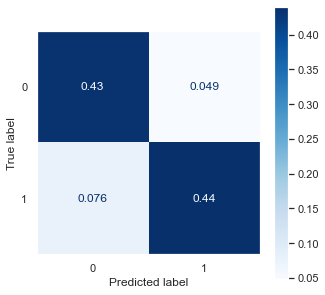

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay, accuracy_score, precision_score ,classification_report, f1_score

#model
lr = LogisticRegression()
lr= lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

#confusion matrix
# configurations for plot
fig, _ = plt.subplots(nrows=1, figsize=(5,5))
ax = plt.subplot(1, 1, 1)
ax.grid(False)

#confusion
cm = confusion_matrix(y_test, lr_predict, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
_= cmd.plot(ax=ax, cmap= "Blues")

#print scores
print("Accuracy of LR on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy of LR on test set: {:.3f}".format(lr.score(X_test, y_test)))
print('\n') #create space


#append results to list model_comparison
model_comparison[lr] = [accuracy_score(y_test, lr_predict), f1_score(y_test, y_pred, average= "weighted")]

#precision, recall and f1
print(classification_report(y_test, lr_predict))


##### SVC

Train accuracy: 0.871
Test accuracy: 0.870
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.90      0.84      0.87        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



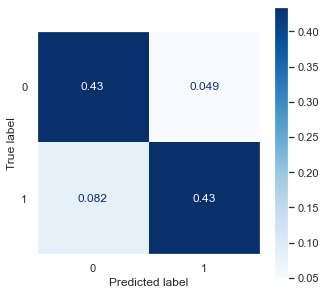

In [224]:
from sklearn.svm import SVC

#parameters
model = SVC(gamma =0.1, kernel="linear")
model.fit(X_train, y_train)

#predict
prediction = model.predict(X_test)

#print
print("Train accuracy: {:.3f}".format(model.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(model.score(X_test, y_test)))


#append to model comparison
model_comparison["SVC"] = [accuracy_score(y_test, prediction), f1_score(y_test, prediction, average="weighted")]

#classification report
print(classification_report(y_test,prediction))

#confusion matrix
# configurations for plot
fig, _ = plt.subplots(nrows=1, figsize=(5,5))
ax = plt.subplot(1, 1, 1)
ax.grid(False)

#confusion matrix
cm = confusion_matrix(y_test, prediction, normalize= "all")
cmd = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
_= cmd.plot(ax=ax, cmap= "Blues")

#### Random Forest Classifier

In [222]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=0)
param_grid = {
    "n_estimators": range(10,100,10),
    "criterion": ["gini", "entropy"],
    'max_features': ['sqrt',9],
    "max_depth": [5, 10]
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid=param_grid, scoring= "accuracy", cv=8)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 9, 'n_estimators': 90}


In [223]:
rfc = RandomForestClassifier(random_state=0, criterion = 'gini', max_features= 9, n_estimators = 90, max_depth=5)

rfc_predicted = CV_rfc.predict(X_test)

print("Accuracy of RFC classificer on training set: {:.3f}".format(CV_rfc.score(X_train, y_train)))
print("Accuracy of RFC classificer on test set: {:.3f}".format(CV_rfc.score(X_test, y_test)))


#append to model comparison
model_comparison["SVC"] = [accuracy_score(y_test, prediction), f1_score(y_test, prediction, average="weighted")]


Accuracy of RFC classificer on training set: 0.916
Accuracy of RFC classificer on test set: 0.826


# Model Comparison

In [225]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ["Accuracy", "F1 Score"]
model_comparison_df = model_comparison_df.sort_values("F1 Score", ascending= True)
model_comparison_df.style.background_gradient(cmap= "RdBu_r")

,Accuracy,F1 Score
LogisticRegression(),0.875000,0.853022
SVC,0.869565,0.869565
